<a href="https://colab.research.google.com/github/JudsonLima/computationalImaging/blob/master/HW3_JudsonLimaTrial1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computational Imaging HW 3

Judson Lima

OPTI 556, Fall 2023

##Libraries

In [6]:
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.activations import gelu, elu, sigmoid, swish, relu
import matplotlib.pyplot as plt
from scipy import interpolate as interp
from scipy.special import expit
from google.colab import files
from skimage.metrics import mean_squared_error as mse
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
import imageio
from PIL import Image
import cv2
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
tf.experimental_relax_shapes=True

### Activation functions

The structure of the activation function is the backbone to the operation of neural networks. depicted below are the common activation functions used for the success of multilayer backpropagation learning. The vanishing gradient problem, where the derivative vanishes over the range, is a particular issue amoung the use of different activation functions. The gelu and elu are attempts at solving this problem. It can be noted that structure of the activation function itself can be a trainable parameter.

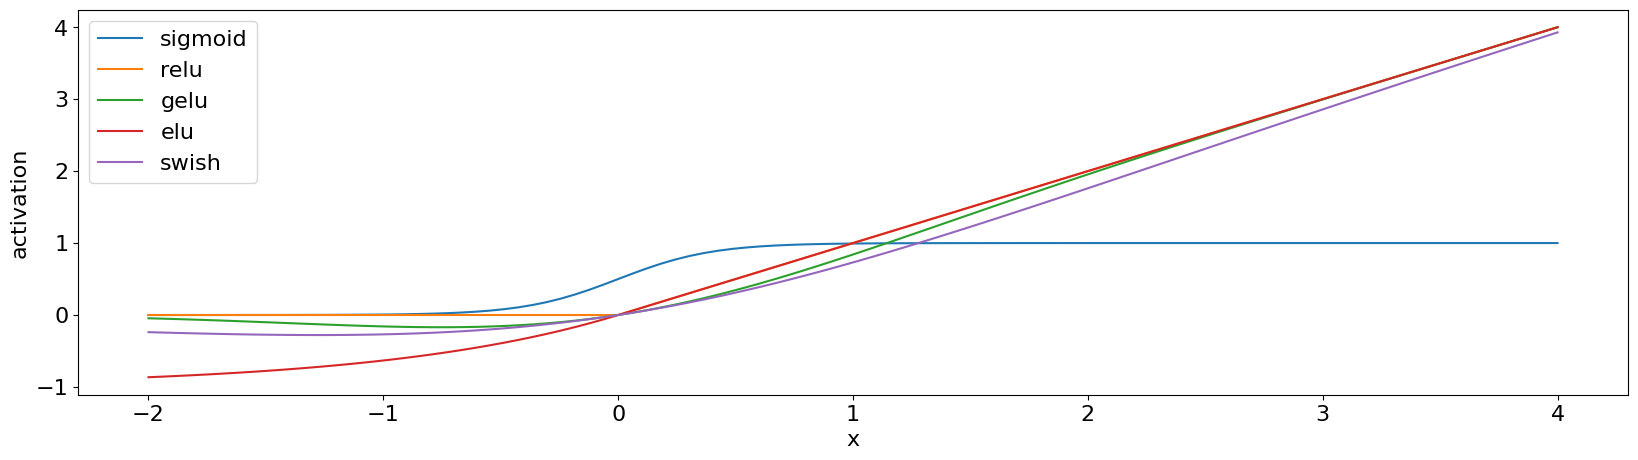

In [2]:
#
# relu, sigmoid and softmax optimization functions
#
plt.rcParams['figure.figsize'] = [20, 5]
plt.rcParams.update({'font.size': 16})
x=np.linspace(-2,4,100)
plt.plot(x,sigmoid(5*x),label='sigmoid')
plt.plot(x,relu(x),label='relu')
plt.plot(x,gelu(x),label='gelu')
plt.plot(x,elu(x),label='elu')
plt.plot(x,swish(x),label='swish')
plt.xlabel('x')
plt.ylabel('activation')
plt.legend()

In [3]:
!pip install visualkeras
import visualkeras

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 6.0 MB/s eta 0:00:00


In [5]:
!pip install rawpy
import rawpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 16.9 MB/s eta 0:00:00


## Demosaicing with neural processing



Training data set:

The Kodak photo cd data set, which was digitized from film as raw, is used for training. 24 images are broken down into sub images to get more trainable sets for the algorithm.

These images were never sampled uisng CFA and are raw rgb images.

image set comes from https://www.kaggle.com/datasets/sherylmehta/kodak-dataset?select=kodim24.png and are available as in png format.

In [8]:
im=np.zeros((24,512,768,3))
for pop in range(1,10):
  fileN="kodim0"+str(pop)+".png"
  imm = Image.open(fileN)
  imm=np.array(imm)
  w,h,c =imm.shape
  if w>h:
    imm=imm.transpose(1,0,2)
  im[pop-1,:,:,:]=np.array(imm)/255.
for pop in range(10,25):
  fileN="kodim"+str(pop)+".png"
  imm = Image.open(fileN)
  imm=np.array(imm)
  w,h, c =imm.shape
  if w>h:
    imm=imm.transpose(1,0,2)
  im[pop-1,:,:,:]=np.array(imm)/255.

FileNotFoundError: ignored

In [ ]:
plt.imshow(im[1,:,:,:])
plt.axis('off')